In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize

import warnings

warnings.filterwarnings('ignore')


1.Sınavlardaki performans cinsiyete, kökene ve anne-baba eğitim durumuna göre değişiklik göstermekte midir?

2.Öğle yemek tipinin sınav performansları ile bir ilişkisi var mı? Varsa bunu nasıl açıklayabilirsiniz?

3.Hazırlık kurslarının sonav performansı üzerinde bir etkisi var mı?

4.Birbiriyle korelasyonu en fazla olan dersler hangisidir?

In [2]:
sinavlarda_ogrenci = pd.read_csv("StudentsPerformance.csv")
sinavlarda_ogrenci.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


1.Sınavlardaki performans cinsiyete, kökene ve anne-baba eğitim durumuna göre değişiklik göstermekte midir?

In [3]:
sinavlarda_ogrenci['performance'] = (sinavlarda_ogrenci['math score'] + sinavlarda_ogrenci['reading score']+ sinavlarda_ogrenci['writing score']).astype(int)
sinavlarda_ogrenci.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,performance
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


In [4]:
sinavlarda_ogrenci.groupby("gender").mean()

,math score,reading score,writing score,performance
gender,,,,
female,63.633205,72.608108,72.467181,208.708494
male,68.728216,65.473029,63.311203,197.512448


In [5]:
sinavlarda_ogrenci.groupby("race/ethnicity").mean()

,math score,reading score,writing score,performance
race/ethnicity,,,,
group A,61.629213,64.674157,62.674157,188.977528
group B,63.452632,67.352632,65.600000,196.405263
group C,64.463950,69.103448,67.827586,201.394984
group D,67.362595,70.030534,70.145038,207.538168
group E,73.821429,73.028571,71.407143,218.257143


In [6]:
sinavlarda_ogrenci.groupby("parental level of education").mean()

,math score,reading score,writing score,performance
parental level of education,,,,
associate's degree,67.882883,70.927928,69.896396,208.707207
bachelor's degree,69.389831,73.000000,73.381356,215.771186
high school,62.137755,64.704082,62.448980,189.290816
master's degree,69.745763,75.372881,75.677966,220.796610
some college,67.128319,69.460177,68.840708,205.429204
some high school,63.497207,66.938547,64.888268,195.324022


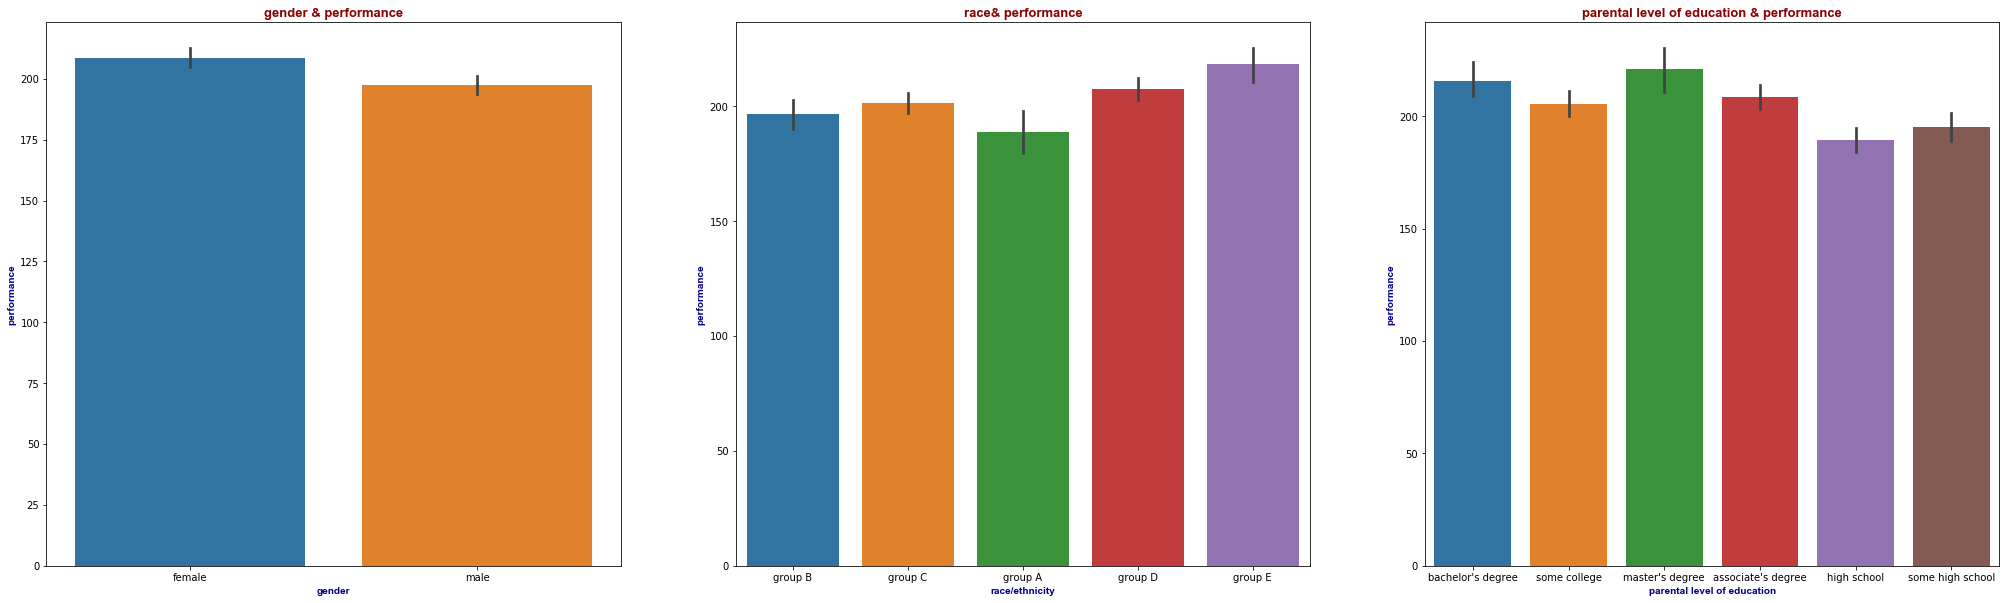

In [7]:
plt.figure(figsize=(35,10))
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

plt.subplot(1,3,1)
sns.barplot(sinavlarda_ogrenci["gender"], sinavlarda_ogrenci["performance"])
plt.title("gender & performance", fontdict=baslik_font)
plt.xlabel('gender', fontdict=eksen_font )
plt.ylabel('performance', fontdict=eksen_font )


plt.subplot(1,3,2)
sns.barplot(sinavlarda_ogrenci["race/ethnicity"], sinavlarda_ogrenci["performance"])
plt.title("race& performance", fontdict=baslik_font)
plt.xlabel('race/ethnicity', fontdict=eksen_font )
plt.ylabel('performance', fontdict=eksen_font )

plt.subplot(1,3,3)
sns.barplot(sinavlarda_ogrenci["parental level of education"], sinavlarda_ogrenci["performance"])
plt.title("parental level of education & performance", fontdict=baslik_font)
plt.xlabel('parental level of education', fontdict=eksen_font )
plt.ylabel('performance', fontdict=eksen_font )

plt.show()

2.Öğle yemek tipinin sınav performansları ile bir ilişkisi var mı? Varsa bunu nasıl açıklayabilirsiniz?


In [8]:
sinavlarda_ogrenci.groupby("lunch").mean()

,math score,reading score,writing score,performance
lunch,,,,
free/reduced,58.921127,64.653521,63.022535,186.597183
standard,70.034109,71.654264,70.823256,212.511628


In [9]:
#Ogle Yemegi & math score iliskisi
freeLucnh_math = sinavlarda_ogrenci [sinavlarda_ogrenci ["lunch"] == 'free/reduced']['math score']
standartLucnh_math = sinavlarda_ogrenci [sinavlarda_ogrenci ["lunch"] == 'standard']['math score']

In [10]:
ttest = stats.ttest_ind(freeLucnh_math,standartLucnh_math)
print("p deger: {:-4f}".format(ttest[1]))

p deger: 0.000000


aralarindaki fark anlamli bir fark <0.05

In [11]:
#Ogle yemegi ve Reading score iliskisi
freeLucnh_reading = sinavlarda_ogrenci [sinavlarda_ogrenci ["lunch"] == 'free/reduced']['reading score']
standartLucnh_reading = sinavlarda_ogrenci [sinavlarda_ogrenci ["lunch"] == 'standard']['reading score']


In [12]:
ttest = stats.ttest_ind(freeLucnh_reading, standartLucnh_reading)
print("p deger: {:-4f}".format(ttest[1]))

p deger: 0.000000


aralarindaki fark anlamli bir fark <0.05

In [13]:
#Lunch ve Writing score iliskisi
freeLucnh_writing = sinavlarda_ogrenci [sinavlarda_ogrenci ["lunch"] == 'free/reduced']['writing score']
standartLucnh_writing = sinavlarda_ogrenci [sinavlarda_ogrenci ["lunch"] == 'standard']['writing score']


In [14]:
ttest = stats.ttest_ind(freeLucnh_writing,standartLucnh_writing)
print("p deger: {:-4f}".format(ttest[1]))

p deger: 0.000000


aralarindaki fark anlamli bir fark <0.05

In [15]:
yemek_tipi = ["free/reduced", "standard"]
dersler = ['math score', 'reading score', 'writing score']

for ders in dersler:
    print(ders)
    print("-------")
    for i in range(len(yemek_tipi)):
        for j in range(i+1,len(yemek_tipi)):
            ilk_veri = sinavlarda_ogrenci[sinavlarda_ogrenci.lunch == yemek_tipi[i]][ders]
            ikinci_veri = sinavlarda_ogrenci[sinavlarda_ogrenci.lunch == yemek_tipi[j]][ders]
            ttest_pdegeri = stats.ttest_ind(ilk_veri,ikinci_veri)[1]
            if ttest_pdegeri < 0.05 :
                p_degeri = "Fark anlamlı"
            else:
                p_degeri = "Fark anlamsız"
            print("{}-{} karşılaştırma için p değeri {:.5f} ---> {}". format(yemek_tipi[i],
                                                                             yemek_tipi[j],
                                                                             ttest_pdegeri,p_degeri))
    print("\n")

math score
-------
free/reduced-standard karşılaştırma için p değeri 0.00000 ---> Fark anlamlı


reading score
-------
free/reduced-standard karşılaştırma için p değeri 0.00000 ---> Fark anlamlı


writing score
-------
free/reduced-standard karşılaştırma için p değeri 0.00000 ---> Fark anlamlı




3.Hazırlık kurslarının sinav performansı üzerinde bir etkisi var mı?

In [16]:
sinavlarda_ogrenci.groupby("test preparation course").mean()


,math score,reading score,writing score,performance
test preparation course,,,,
completed,69.695531,73.893855,74.418994,218.008380
none,64.077882,66.534268,64.504673,195.116822


In [17]:
preparation_course_math = sinavlarda_ogrenci [sinavlarda_ogrenci ["test preparation course"] == 'completed']["math score"] 
none_preparation_course_math = sinavlarda_ogrenci [sinavlarda_ogrenci ["test preparation course"] == 'none']['math score'] 

In [18]:
ttest = stats.ttest_ind(preparation_course_math,none_preparation_course_math)
print("p deger: {:-2f}".format(ttest[1]))

p deger: 0.000000


anlamli bir iliski oldugunu soyleyebiliriz

4.Birbiriyle korelasyonu en fazla olan dersler hangisidir?

In [19]:
sinavlarda_ogrenci.corr()

,math score,reading score,writing score,performance
math score,1.000000,0.817580,0.802642,0.918746
reading score,0.817580,1.000000,0.954598,0.970331
writing score,0.802642,0.954598,1.000000,0.965667
performance,0.918746,0.970331,0.965667,1.000000


Okuma skoru ve yazma skoru arasinda en yuksek korelasyonun oldugunu goruyoruz(0.95). Daha sonra matematik ve okuma arasindaki korelasyon gelmektedir (0.81). Yazma ve matematik arasindaki korelasyon yine yuksek olmakla birlikte, verilerimiz arasindaki en dusuk korelasyondur(0.80).

In [20]:
sinavlarda_ogrenci.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,performance
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


In [21]:
sinavlarda_ogrenci

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,performance
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229
5,female,group B,associate's degree,standard,none,71,83,78,232
6,female,group B,some college,standard,completed,88,95,92,275
7,male,group B,some college,free/reduced,none,40,43,39,122
8,male,group D,high school,free/reduced,completed,64,64,67,195
9,female,group B,high school,free/reduced,none,38,60,50,148


In [22]:
sinavlarda_ogrenci.drop(2,axis=0,inplace=True)

In [23]:
sinavlarda_ogrenci.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,performance
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229
5,female,group B,associate's degree,standard,none,71,83,78,232


In [30]:
#burda sadece bu komutla degistirdik asli degismedi 
sorted_by_race = sinavlarda_ogrenci.sort_values(by="race/ethnicity")

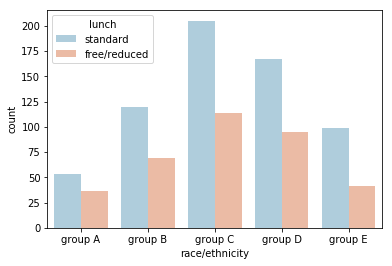

In [32]:
sns.countplot(x='race/ethnicity',hue='lunch',data=sorted_by_race ,palette='RdBu_r');